# Template matching

Fuentes consultadas:

https://pyimagesearch.com/2021/03/22/opencv-template-matching-cv2-matchtemplate/

https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html

https://www.scirp.org/html/1-3400334_45577.htm

https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

https://www.codegrepper.com/code-examples/python/python+create+video+from+images

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imgprueba = cv.imread('Escena1/Foto100.jpg')

In [3]:
imgprueba.shape

(3648, 5472, 3)

In [4]:
template = cv.imread('Escena1/template2.jpg')

In [5]:
imageGray = cv.cvtColor(imgprueba, cv.COLOR_BGR2GRAY)
templateGray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

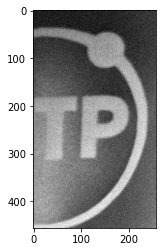

In [6]:
plt.imshow(templateGray, cmap='gray')

In [7]:
result = cv.matchTemplate(imageGray, templateGray,
	cv.TM_CCOEFF_NORMED)

In [8]:
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)

In [9]:
(startX, startY) = maxLoc
endX = startX + template.shape[1]
endY = startY + template.shape[0]

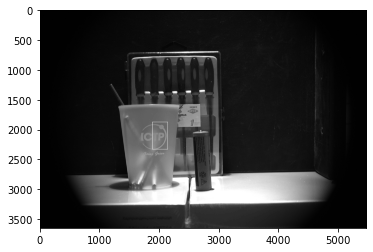

In [10]:
cv.rectangle(imageGray, (startX, startY), (endX, endY), (255, 0, 0), 3)
# show the output image
plt.imshow(imageGray, cmap = 'gray')

In [11]:
print(startY, endY)

1874 2330


In [12]:
def distances(template, ctex,ctey, img):
    """
    Funcion que devuelve la distancia entre la imagen original y la corrida 
    utilizando template matching
    Entradas: Template, endx de la imagen original, imagen corrida
    Salida: Distancia entre la imagen corrida y la original

    """
    imageGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    templateGray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    #Encuentro el sector de la imagen que mas matchea el template
    #Esta funcion devuelve una matriz con un 1 donde es mas probable que exista el match
    #Es mas probable en el sentido del coeficiente de correlacion normalizado, normalized correlation coefficient
    result = cv.matchTemplate(imageGray, templateGray,cv.TM_CCOEFF_NORMED)
    #Encuentro donde se dan los maximos y minimos
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
    #Encuentro los limites del template en la imagen
    (startX, startY) = maxLoc
    endX = startX + template.shape[1]
    endY = startY + template.shape[0]
    distx = ctex - endX
    disty = ctey - endY
    return distx, disty

In [13]:
def traslacion_h(img, distx,disty):
    h, w = img.shape[:2]
    half_height, half_width = h//4, w//8
    transition_matrix = np.float32([[1, 0, distx],
                                   [0, 1,disty]])

    img_transition = cv.warpAffine(img, transition_matrix, (w, h))
    return img_transition

In [14]:
def to_gs(img):
    R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    gray_img = 0.2989 * R + 0.587 * G + 0.114 * B
    return gray_img

In [15]:
def ploteo(img_ori, img_sumar):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    fig.tight_layout()

    ax[0].imshow(img_ori,  cmap='gray')
    ax[0].set_title("Original")

    ax[1].imshow(img_sumar,  cmap='gray')
    ax[1].set_title("Imagenes sumadas")
    plt.show()
    return 

In [16]:
cteX = endX
cteY = endY

In [17]:
print(cteX, cteY)

2137 2330


# Centrada en dinosaurio con alas

Imagen 2

In [52]:
img1 = cv.imread('Escena1/Foto1.jpg')

35 -666


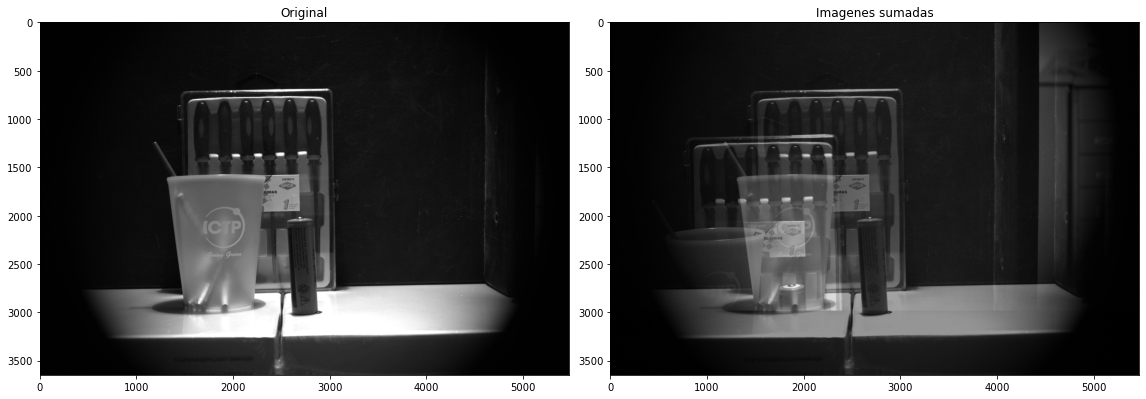

In [53]:
distx, disty = distances(template,cteX,cteY,img1)
print(distx,disty)
resultado = traslacion_h(img1,distx, disty)
ploteo(to_gs(imgprueba),(to_gs(resultado)+ to_gs(imgprueba))/2)

Se ven problemas con el template del vaso por ser transparente

# Automatizacion de subida

In [54]:
import os, os.path

def load(folder_name):
    if (folder_name == 'Foto'):
        num = 1
    else:
        num = 1
    base = folder_name +"%d.jpg"
    print(base%num)
    images = []
    while os.path.isfile(base % num):
        images.append(cv.imread(base % num))
        num += 1
    return images

In [106]:
def enfoque(images, template, mode):
    img1 = cv.imread('Escena4/Foto150.jpg')
    imageGray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    templateGray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    result = cv.matchTemplate(imageGray, templateGray,cv.TM_CCOEFF_NORMED)
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
    (startX, startY) = maxLoc
    endX = startX + template.shape[1]
    cteX = endX
    endY = startY + template.shape[0]
    cteY = endY
    img_c = to_gs(img1)
    for i in range(1,len(images)):
        distx, disty = distances(template,cteX,cteY,images[i])
        resultado = traslacion_h(images[i],distx, disty)
        img_c = to_gs(resultado) + img_c
    if mode == 'ploteo':
        ploteo(to_gs(img1),img_c/len(images))
        img = img_c/len(images)
    else:
        img = img_c/len(images)
    return img

# Escena 1

In [79]:
templates = load('Escena1/template')
images = load('Escena2/Foto')

Escena1/template1.jpg
Escena2/Foto1.jpg


In [80]:
len(images)

278

In [ ]:
resultados = []
for i in range(len(templates)):
    resultados.append(enfoque(images,templates[i],'ploteo'))

In [ ]:
for i in range(len(resultados)):
    cv.imwrite('img_fin'+ str(i) +'.jpg',resultados[i])

# Video escena 1

In [ ]:
frames = load('img_fin')
plt.imshow(frames[0])
frames[0].shape

In [ ]:
fourcc = cv.VideoWriter_fourcc(*'mp4v') 
video = cv.VideoWriter('Avideo_final.avi', fourcc, 1, (images[0].shape[1], images[0].shape[0]))
img0 = cv.imread('Imagen1')
video.write(img0)
for i in range(4):
    img = cv.imread('img_fin'+ str(i) + '.png')
    video.write(img)
video.write(img0)
video.write(img0)
video.write(img0)

# Escena 2

In [56]:
imgprueba = cv.imread('Escena2/Foto230.jpg')

In [57]:
imageGray = cv.cvtColor(imgprueba, cv.COLOR_BGR2GRAY)

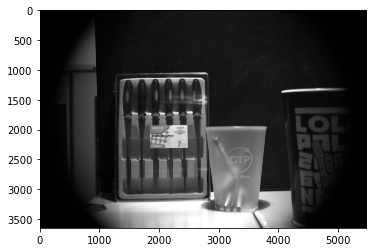

In [58]:
plt.imshow(imageGray, cmap='gray')

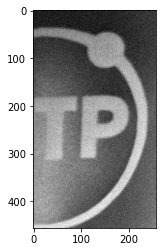

In [59]:
template1 = cv.cvtColor(cv.imread('Escena2/template2.jpg'), cv.COLOR_BGR2GRAY)
plt.imshow(template1, cmap = 'gray')

In [60]:
result = cv.matchTemplate(imageGray, template1,
	cv.TM_CCOEFF_NORMED)


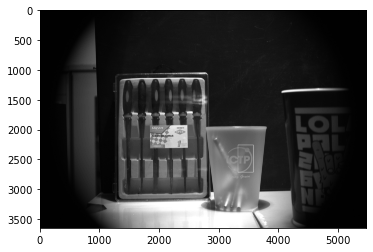

In [61]:
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
(startX, startY) = maxLoc
endX = startX + template1.shape[1]
endY = startY + template1.shape[0]
cv.rectangle(imageGray, (startX, startY), (endX, endY), (255, 0, 0), 3)
# show the output image
plt.imshow(imageGray, cmap = 'gray')

In [98]:
def load2(folder_name):
    if (folder_name == 'Escena4/Foto'):
        num = 1
    else:
        num = 1
    base = folder_name +"%d.jpg"
    print(base%num)
    images = []
    while os.path.isfile(base % num):
        images.append(cv.imread(base % num))
        num += 1
    return images

In [63]:
templates2 = load2('Escena2/template')
images2 = load2('Escena2/Foto')

Escena2/template1.jpg
Escena2/Foto1.jpg


KeyboardInterrupt: 

In [ ]:
len(images2)

In [ ]:
resultados2 = []
for i in range(len(templates2)):
    resultados2.append(enfoque(images2,templates2[i],'ploteo'))

In [ ]:
for i in range(len(resultados2)):
    cv.imwrite('Escena2\img_fin'+ str(i) +'.jpg',resultados2[i])

In [ ]:
fourcc = cv.VideoWriter_fourcc(*'mp4v') 
video = cv.VideoWriter('Escena2\Avideo_final.avi', fourcc, 1, (images2[0].shape[1], images2[0].shape[0]))
img0 = cv.imread('Imagen1')
video.write(img0)
for i in range(4):
    img = cv.imread('Escena2\img_fin'+ str(i) + '.jpg')
    video.write(img)
video.write(img0)
video.write(img0)
video.write(img0)

# Escena 3

In [65]:
imgprueba = cv.imread('Escena3/Foto230.jpg')

In [66]:
imageGray = cv.cvtColor(imgprueba, cv.COLOR_BGR2GRAY)

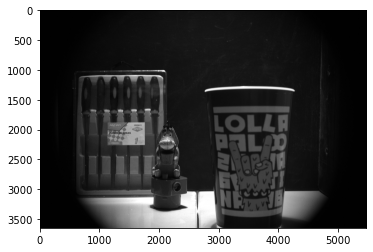

In [67]:
plt.imshow(imageGray, cmap='gray')

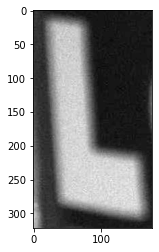

In [68]:
template1 = cv.cvtColor(cv.imread('Escena3/template1.jpg'), cv.COLOR_BGR2GRAY)
plt.imshow(template1, cmap = 'gray')

In [69]:
result = cv.matchTemplate(imageGray, template1,
	cv.TM_CCOEFF_NORMED)

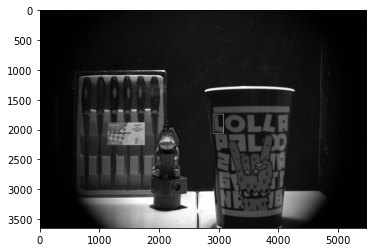

In [70]:
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
(startX, startY) = maxLoc
endX = startX + template1.shape[1]
endY = startY + template1.shape[0]
cv.rectangle(imageGray, (startX, startY), (endX, endY), (255, 0, 0), 3)
# show the output image
plt.imshow(imageGray, cmap = 'gray')

In [77]:
templates3 = load2('Escena3/template')
images3 = load2('Escena3/Foto')

Escena3/template200.jpg
Escena3/Foto200.jpg


In [78]:
len(images3)

160

In [85]:
templates3 = load2('Escena3/template')
len(templates3)

Escena3/template1.jpg


3

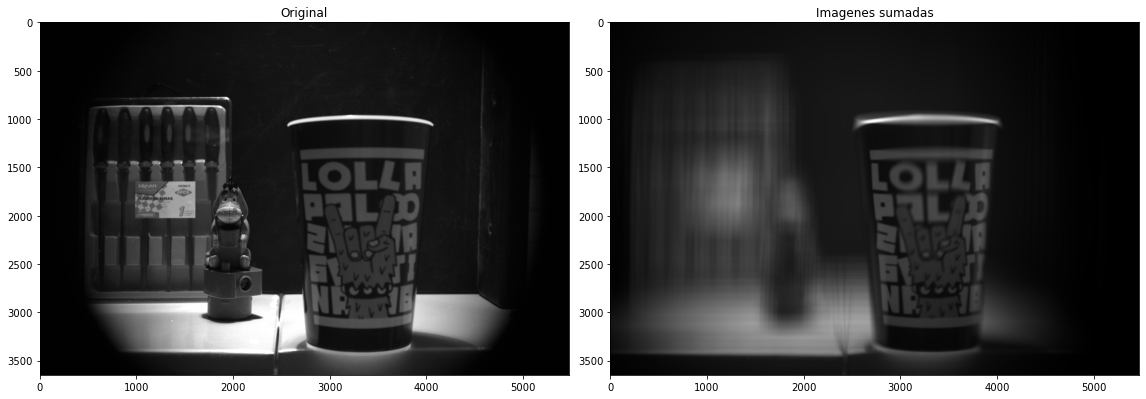

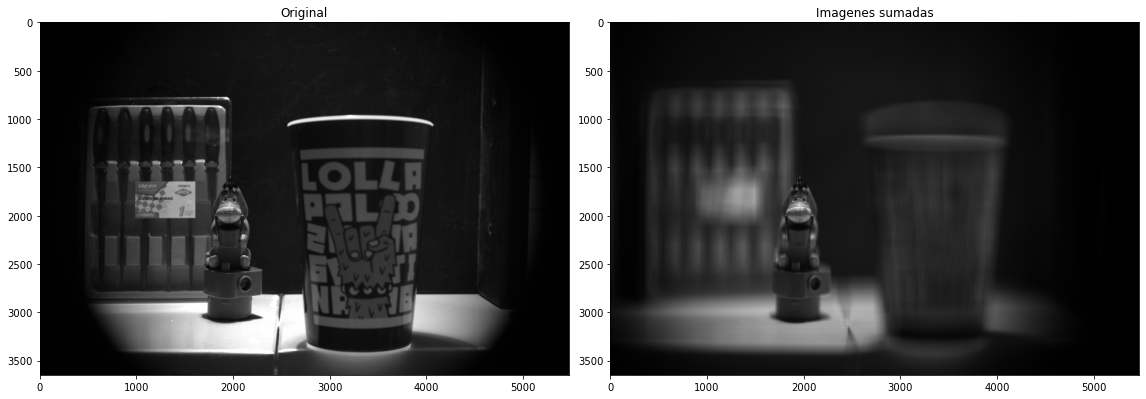

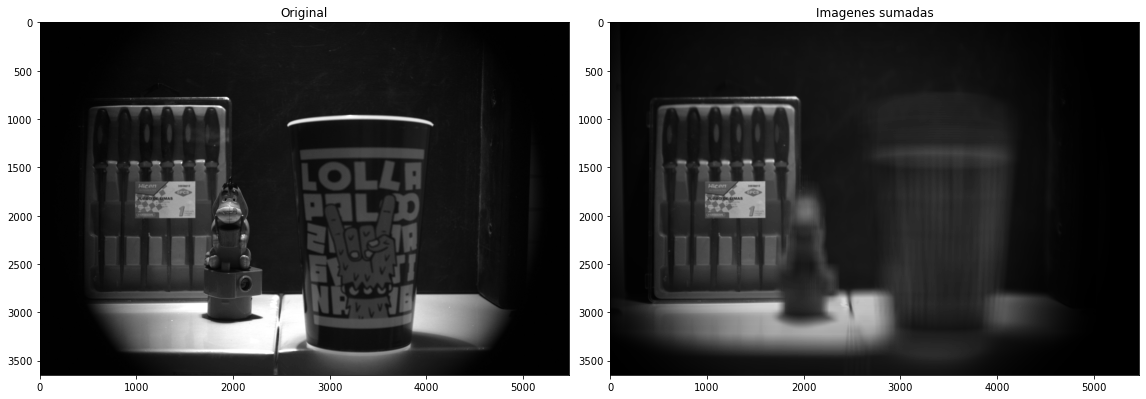

In [88]:
resultados3 = []
for i in range(len(templates3)):
    resultados3.append(enfoque(images3,templates3[i],'ploteo'))

In [89]:
for i in range(len(resultados3)):
    cv.imwrite('Escena3\img_fin'+ str(i) +'.jpg',resultados3[i])

In [91]:
fourcc = cv.VideoWriter_fourcc(*'mp4v') 
video = cv.VideoWriter('Escena3\Avideo_final.avi', fourcc, 1, (images3[0].shape[1], images3[0].shape[0]))
img0 = cv.imread('Imagen1')
video.write(img0)
for i in range(4):
    img = cv.imread('Escena3\img_fin'+ str(i) + '.jpg')
    video.write(img)
video.write(img0)
video.write(img0)
video.write(img0)

# Escena 4

In [92]:
imgprueba = cv.imread('Escena4/Foto230.jpg')

In [93]:
imageGray = cv.cvtColor(imgprueba, cv.COLOR_BGR2GRAY)

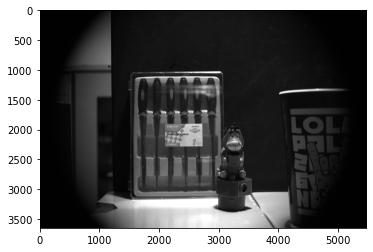

In [94]:
plt.imshow(imageGray, cmap='gray')

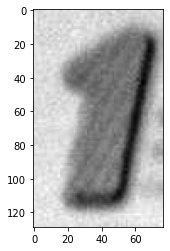

In [102]:
template1 = cv.cvtColor(cv.imread('Escena4/template3.jpg'), cv.COLOR_BGR2GRAY)
plt.imshow(template1, cmap = 'gray')

In [103]:
result = cv.matchTemplate(imageGray, template1,
	cv.TM_CCOEFF_NORMED)

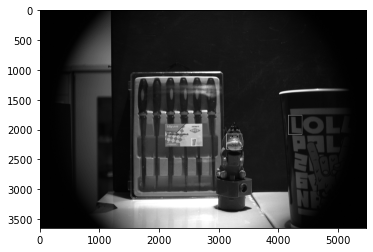

In [104]:
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)
(startX, startY) = maxLoc
endX = startX + template1.shape[1]
endY = startY + template1.shape[0]
cv.rectangle(imageGray, (startX, startY), (endX, endY), (255, 0, 0), 3)
# show the output image
plt.imshow(imageGray, cmap = 'gray')

In [105]:
templates4 = load2('Escena4/template')
images4 = load2('Escena4/Foto')

Escena4/template1.jpg
Escena4/Foto1.jpg


In [107]:
len(images4)

289

In [108]:
len(templates4)

3

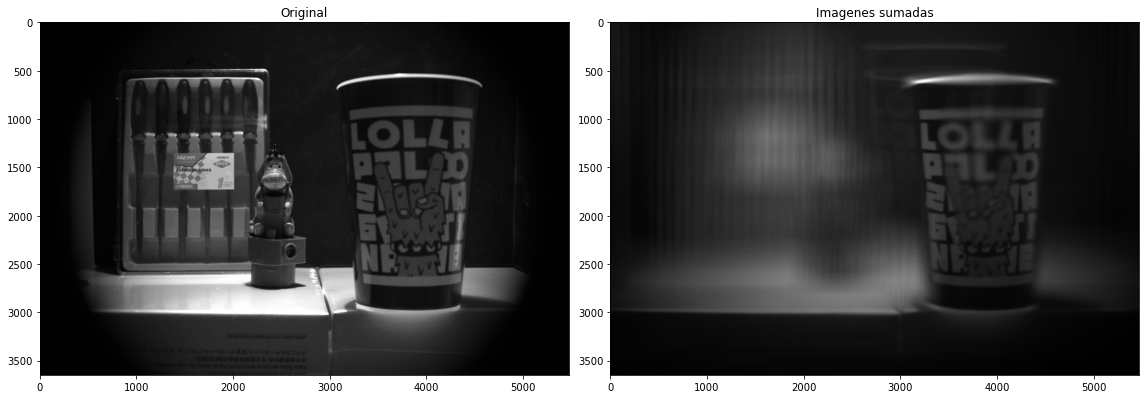

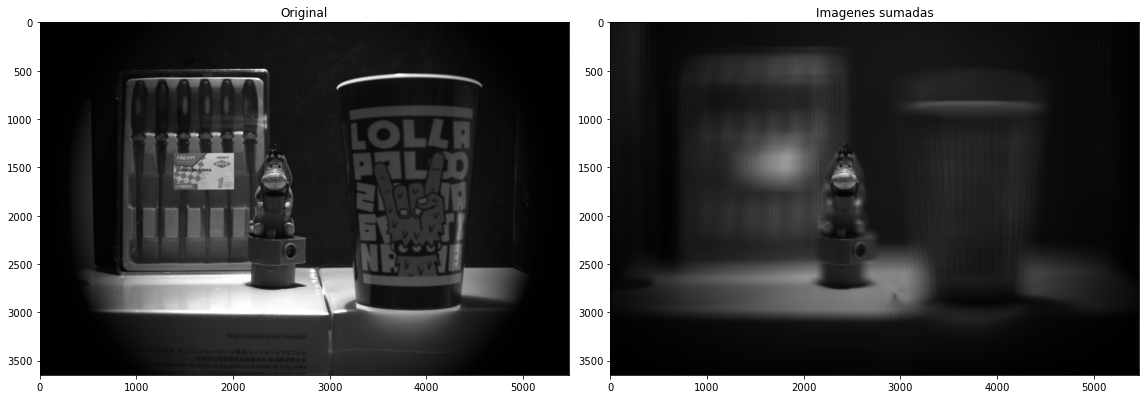

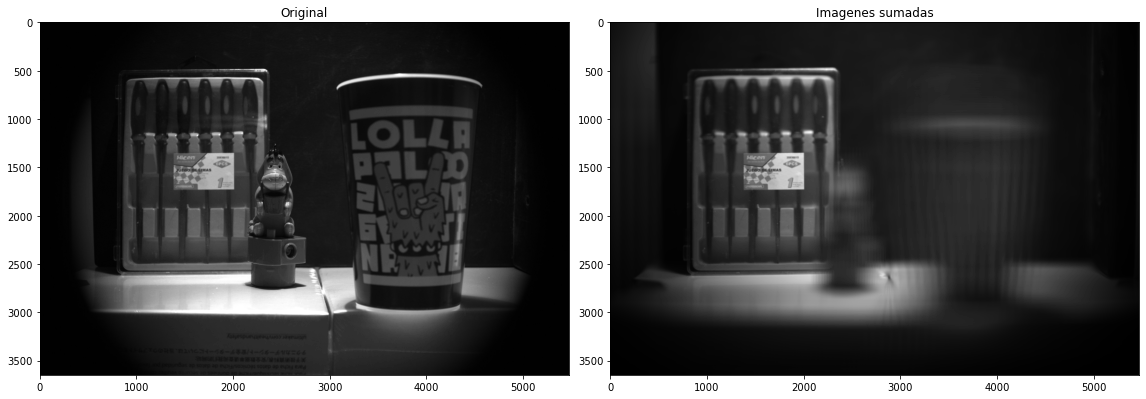

In [109]:
resultados4 = []
for i in range(len(templates4)):
    resultados4.append(enfoque(images4,templates4[i],'ploteo'))

In [110]:
for i in range(len(resultados4)):
    cv.imwrite('Escena4\img_fin'+ str(i) +'.jpg',resultados4[i])

In [112]:
fourcc = cv.VideoWriter_fourcc(*'mp4v') 
video = cv.VideoWriter('Escena4\Avideo_final.avi', fourcc, 1, (images4[0].shape[1], images4[0].shape[0]))
img0 = cv.imread('Imagen1')
video.write(img0)
for i in range(4):
    img = cv.imread('Escena4\img_fin'+ str(i) + '.jpg')
    video.write(img)
video.write(img0)
video.write(img0)
video.write(img0)